In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [2]:
# Load the loan approval dataset
df=pd.read_csv('/content/drive/MyDrive/project data/loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
# Check for missing values
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [4]:
# Display data types of each column
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [5]:
# Preprocess the data
# using map() function change the column value to integer
df[' education']=df[' education'].map({' Not Graduate':0,' Graduate':1})
df[' self_employed']=df[' self_employed'].map({' No':0,' Yes':1})
df[' loan_status']=df[' loan_status'].map({' Rejected':0,' Approved':1})
# drop column loan_id
df.drop(['loan_id'],axis=1,inplace=True)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [6]:
# Display data types of each column
df.dtypes

 no_of_dependents            int64
 education                   int64
 self_employed               int64
 income_annum                int64
 loan_amount                 int64
 loan_term                   int64
 cibil_score                 int64
 residential_assets_value    int64
 commercial_assets_value     int64
 luxury_assets_value         int64
 bank_asset_value            int64
 loan_status                 int64
dtype: object

In [7]:
# Split the data (input)
X=df.iloc[:,:-1]
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [8]:
# Split the data(output)
y=df.iloc[:,-1]
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name:  loan_status, Length: 4269, dtype: int64

In [9]:
# Fit and transform the features using MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.4       , 1.        , 0.        , ..., 0.90721649, 0.57583548,
        0.54421769],
       [0.        , 0.        , 1.        , ..., 0.11340206, 0.218509  ,
        0.2244898 ],
       [0.6       , 1.        , 0.        , ..., 0.23195876, 0.84832905,
        0.8707483 ],
       ...,
       [0.4       , 0.        , 0.        , ..., 0.63917526, 0.45758355,
        0.49659864],
       [0.2       , 0.        , 0.        , ..., 0.03608247, 0.35475578,
        0.39455782],
       [0.2       , 1.        , 0.        , ..., 0.60824742, 0.91002571,
        0.81632653]])

In [10]:
# Assuming X_scaled and y are your scaled features and target variable
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [11]:
dec=DecisionTreeClassifier()
knn=KNeighborsClassifier()
nb=GaussianNB()
sv=SVC()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
models=[dec,knn,sv,nb,rf,ad]
for model in models:
  print("***************",model,"***************")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

*************** DecisionTreeClassifier() ***************
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       483
           1       0.99      0.98      0.98       798

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281

*************** KNeighborsClassifier() ***************
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       483
           1       0.92      0.91      0.91       798

    accuracy                           0.89      1281
   macro avg       0.89      0.89      0.89      1281
weighted avg       0.89      0.89      0.89      1281

*************** SVC() ***************
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       483
           1       0.96      0.93      0.94       798

    accuracy                    

In [12]:
# Train the Decision Tree model
dec=DecisionTreeClassifier()    #criterion="entropy"
dec.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred=dec.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       483
           1       0.99      0.98      0.98       798

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



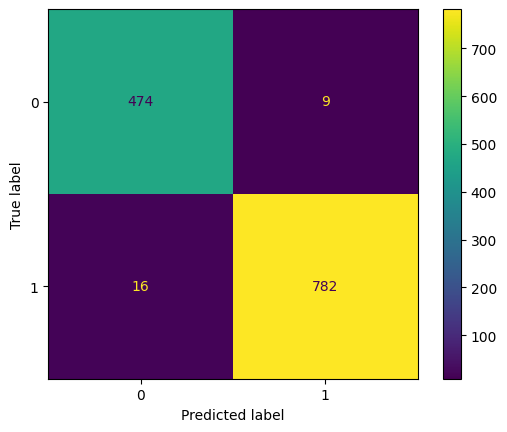

In [14]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [15]:
yne=dec.predict(scaler.transform([[0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000]]))
yne

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0])

<Axes: >

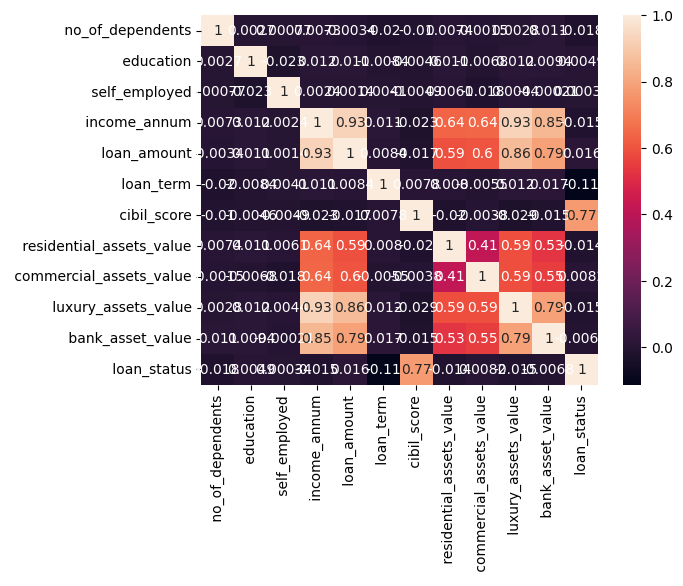

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [18]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00


In [19]:
%%writefile app.py

Writing app.py


In [20]:
! wget -q -o - ipv4.icanhazip.com

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



npx: installed 22 in 5.376s
your url is: https://smooth-frogs-return.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.14.209:8501

0
1
<bound method IndexOpsMixin.value_counts of 0       2
1       0
2       3
3       3
4       5
       ..
4264    5
4265    0
4266    2
4267    1
4268    1
Name:  no_of_dependents, Length: 4269, dtype: int64>
0
1
<bound method IndexOpsMixin.value_counts of 0       2
1       0
2       3
3       3
4       5
       ..
4264    5
4265    0
4266    2
4267    1
4268    1
Name:  no_of_dependents, Length: 4269, dtype: int64>
0
1
<bound method IndexOpsMixin.value_counts of 0       2
1       0
2       3
3       3
4       5
       ..
4264    5
4265    0
4266    2
4267    1
4268    1
Name:  no_of_dependents, Length: 4269, dtype: int64>
0
1
<bound method IndexOpsMixin.value_counts of 0       2
1       0
2       3
3       3
4       5
       ..
4264    5
4265    0
4266    2
4267    1
42

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/project data/loan_approval_dataset.csv')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
df[' education']=df[' education'].map({' Not Graduate':0,' Graduate':1})
df[' self_employed']=df[' self_employed'].map({' No':0,' Yes':1})
df[' loan_status']=df[' loan_status'].map({' Rejected':0,' Approved':1})
df.drop(['loan_id'],axis=1,inplace=True)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)
dec=DecisionTreeClassifier()    #criterion="entropy"
dec.fit(X_train,y_train)
y_pred=dec.predict(X_test)

import streamlit as st
st.title("Loan Approval Prediction App")
print(df[' self_employed'].min())
print(df[' self_employed'].max())
print(df[' no_of_dependents'].value_counts)
no_of_dependents = st.selectbox(" no_of_dependents",[0,1,3,4,5], index=0)         # min_value=0, max_value=100000, value=50000
education = st.selectbox(" education",[0,1], index=0)
self_employed = st.selectbox(" self_employed",[0,1], index=0)
income_annum = st.number_input(" income_annum",min_value=0, max_value=9900000, value=200000)
loan_amount = st.number_input(" loan_amount",min_value=0, max_value=39500000, value=300000)
loan_term = st.selectbox(" loan_term",[2,4,6,8,10,12,14,16,18,20])
cibil_score = st.number_input(" cibil_score",min_value=0, max_value=900, value=300)
residential_assets_value = st.number_input(" residential_assets_value",min_value=-100000, max_value=29100000, value=-100000)
commercial_assets_value = st.number_input(" commercial_assets_value",min_value=0, max_value=19400000, value=0)
luxury_assets_value = st.number_input(" luxury_assets_value",min_value=0, max_value=39200000, value=300000)
bank_asset_value = st.number_input(" bank_asset_value",min_value=0, max_value=14700000, value=0)
if st.button("Submit"):
 y_pred= dec.predict([[no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value]])
 st.subheader("Prediction")
 if y_pred[0]== 1:
  st.write("Congratulations! Your loan is likely to be approved.")
 else:
  st.write("Sorry, your loan is likely to be denied.")